
<html>
    <h1 style="text-align:center;background-color:#fdabce;font-size='150px';text-shadow:5px 5px 5px 5px"> Heart Disease Prediction</h1>
    
</html>
    
        


<html>
    <h1 style="text-align:center;background-color:#abcdef;font-size='150px';"> TABLE OF CONTENTS</h1>
    <ol>
        <li>Import Necessary Library  </li>
        <li>Data </li>
        <li>Data Dictionary</li>
        <li>Preprocessing  </li>
        <li>Exploratory Data Analysis  </li>
        <li>Feature Engineering  </li>
        <li>Train Model  </li>
        <li>Model Accuracy  </li>
        <li>Test  Model</li>
        
    </ol>
    
</html>
    
        

##  Import Necessary Library

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


##  Data 

In [10]:
#df=pd.read_csv('heart.csv')
#df.head()
URL = 'https://drive.google.com/file/d/1Yt7Kr9tbitUscefZdk-5Gt2YN_QQKVmW/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
print('Shape of Data Frame: ',df.shape)

Shape of Data Frame:  (918, 12)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Data Dictionary

In [ ]:
1) Age: Age of the patient [years]
2) Sex: Sex of the patient [M: Male, F: Female]
3) ChestPainType: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4) RestingBP: Resting blood pressure [mm Hg]
5) Cholesterol: Serum cholesterol [mm/dl]
6) FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7) RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8) MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]
9) ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]
10) Oldpeak: ST [Numeric value measured in depression]
11) ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12) HeartDisease: Output class [1: there is a chance of heart failure, 0: Normal]


## Preprocessing

In [14]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [15]:
df.duplicated().sum()

0

##  Exploratory Data Analysis

In [ ]:
df.describe()

In [16]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

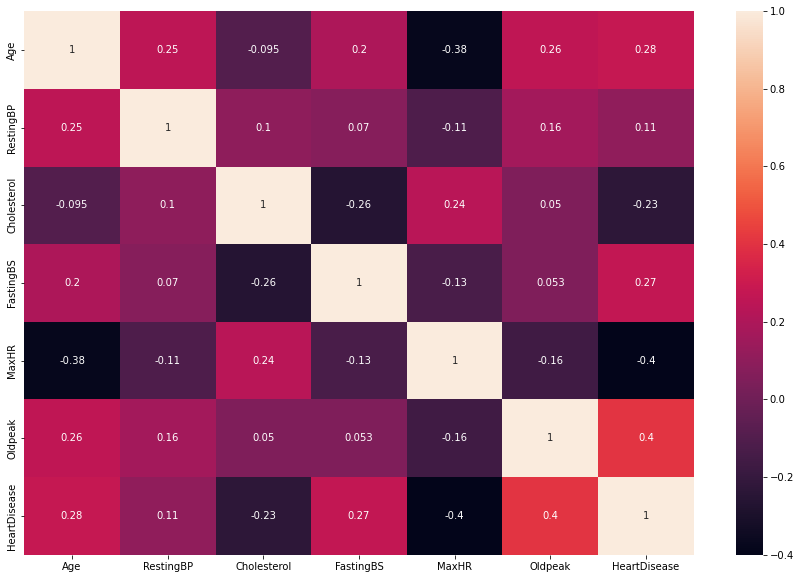

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [20]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [21]:
numerical_column=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
categorical_column=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

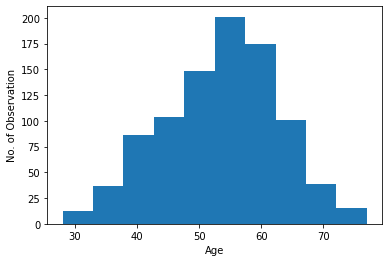

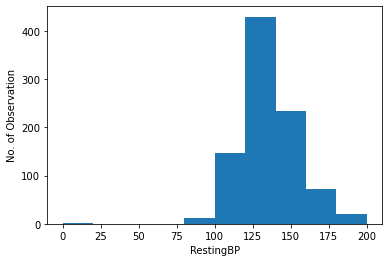

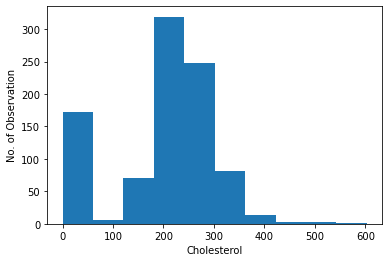

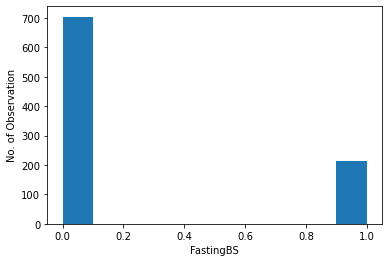

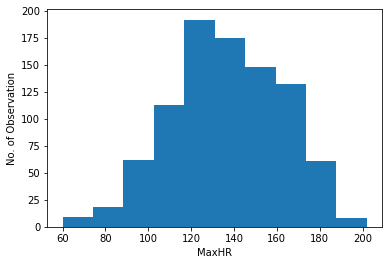

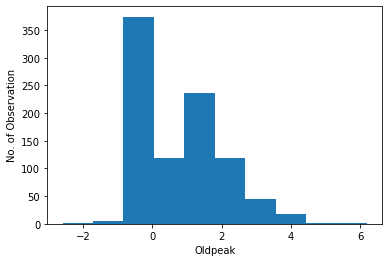

In [22]:
for i in numerical_column:
    plt.xlabel(i)
    plt.ylabel('No. of Observation')
    plt.hist(df[i])
    plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

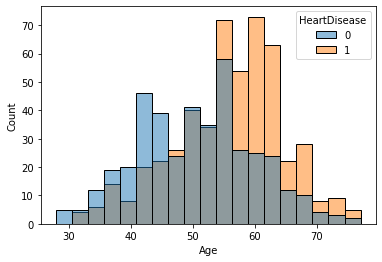

In [23]:
sns.histplot(data=df,x='Age',hue='HeartDisease')

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

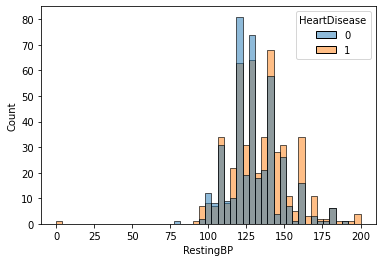

In [24]:
sns.histplot(data=df,x='RestingBP',hue='HeartDisease')

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

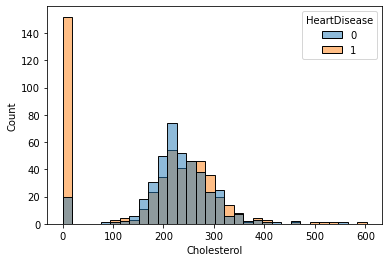

In [25]:
sns.histplot(data=df,x='Cholesterol',hue='HeartDisease')

<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

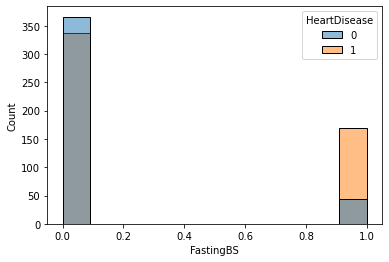

In [26]:
sns.histplot(data=df,x='FastingBS',hue='HeartDisease')

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

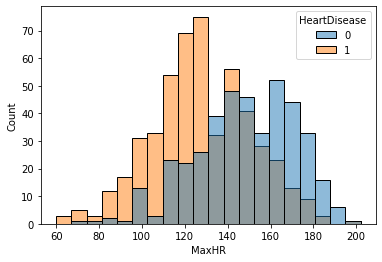

In [27]:
sns.histplot(data=df,x='MaxHR',hue='HeartDisease')

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

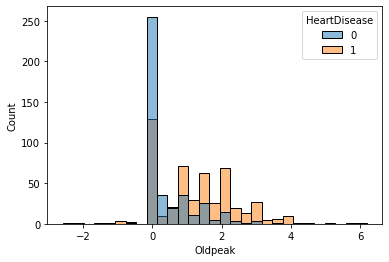

In [28]:
sns.histplot(data=df,x='Oldpeak',hue='HeartDisease')

In [30]:
HaveHeartDisease=df[df['HeartDisease']==1].shape[0]

In [31]:
NotHaveHeartDisease=df[df['HeartDisease']==0].shape[0]

In [32]:
print("No. of Patient Having Heart Disease: ",HaveHeartDisease)
print("No. of Patient don't Have Heart Disease: ",NotHaveHeartDisease)

No. of Patient Having Heart Disease:  508
No. of Patient don't Have Heart Disease:  410


([<matplotlib.patches.Wedge at 0x175a7a521f0>,
 [Text(-0.1835941114214546, 1.0845705151124876, '1'),
  Text(0.1835941114214547, -1.0845705151124876, '0')],
 [Text(-0.10014224259352068, 0.5915839173340841, '55.3%'),
  Text(0.10014224259352074, -0.5915839173340841, '44.7%')])

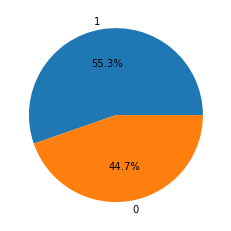

In [33]:
plt.pie([HaveHeartDisease,NotHaveHeartDisease],autopct='%1.1f%%',labels=['1','0'])

## Working with Categorical Data

In [34]:
categorical_column=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

<AxesSubplot:xlabel='Sex', ylabel='Count'>

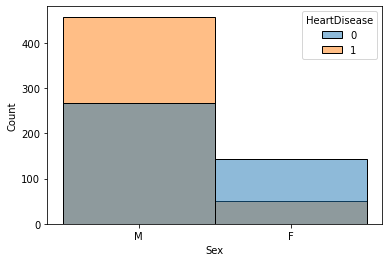

In [35]:
sns.histplot(data=df,x='Sex',hue='HeartDisease')

<AxesSubplot:xlabel='ChestPainType', ylabel='Count'>

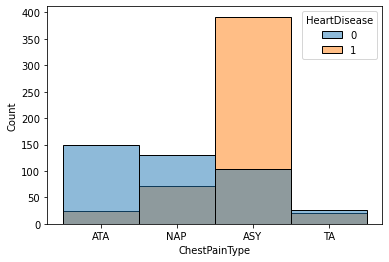

In [36]:
sns.histplot(data=df,x='ChestPainType',hue='HeartDisease')

<AxesSubplot:xlabel='RestingECG', ylabel='Count'>

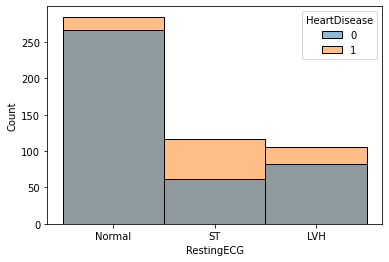

In [37]:
sns.histplot(data=df,x='RestingECG',hue='HeartDisease')

<AxesSubplot:xlabel='ExerciseAngina', ylabel='Count'>

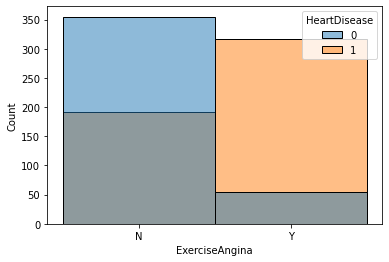

In [38]:
sns.histplot(data=df,x='ExerciseAngina',hue='HeartDisease')

<AxesSubplot:xlabel='ST_Slope', ylabel='Count'>

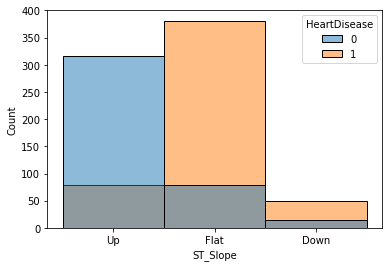

In [39]:
sns.histplot(data=df,x='ST_Slope',hue='HeartDisease')

##  Feature Engineering

In [40]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Training of Model

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [42]:
xtrain.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
801,56,M,ASY,132,184,0,LVH,105,Y,2.1,Flat
158,44,M,ASY,130,290,0,Normal,100,Y,2.0,Flat
596,57,M,ASY,122,264,0,LVH,100,N,0.0,Flat
816,58,M,ASY,125,300,0,LVH,171,N,0.0,Up
132,56,M,ASY,170,388,0,ST,122,Y,2.0,Flat


In [43]:
xtest.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
503,51,M,ASY,132,227,1,ST,138,N,0.2,Up
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down
815,68,M,NAP,118,277,0,Normal,151,N,1.0,Up
888,52,M,ASY,128,204,1,Normal,156,Y,1.0,Flat
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat


In [44]:
#xtrain=pd.get_dummies(xtrain,columns=categorical_column,drop_first=True)
#xtest=pd.get_dummies(xtest,columns=categorical_column,drop_first=True)
#LE=LabelEncoder()
#xtrain['Sex']=LE.fit_transform(xtrain['Sex'])
#xtest['Sex']=LE.transform(xtest['Sex'])
obj={}

#categorical_column=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for i in categorical_column:
    le=LabelEncoder()
    obj[i]=le
    xtrain[i]=obj[i].fit_transform(xtrain[i])
    xtest[i]=obj[i].transform(xtest[i])



C:\Users\shiva\AppData\Local\Temp/ipykernel_692/1720027803.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain[i]=obj[i].fit_transform(xtrain[i])
C:\Users\shiva\AppData\Local\Temp/ipykernel_692/1720027803.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest[i]=obj[i].transform(xtest[i])


In [45]:
obj

{'Sex': LabelEncoder(),
 'ChestPainType': LabelEncoder(),
 'RestingECG': LabelEncoder(),
 'ExerciseAngina': LabelEncoder(),
 'ST_Slope': LabelEncoder()}

In [46]:
print(xtrain.shape,xtest.shape)

(642, 11) (276, 11)


In [47]:
xtrain.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
801,56,1,0,132,184,0,0,105,1,2.1,1
158,44,1,0,130,290,0,1,100,1,2.0,1
596,57,1,0,122,264,0,0,100,0,0.0,1
816,58,1,0,125,300,0,0,171,0,0.0,2
132,56,1,0,170,388,0,2,122,1,2.0,1


In [48]:
xtest.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
503,51,1,0,132,227,1,2,138,0,0.2,2
771,55,1,0,140,217,0,1,111,1,5.6,0
815,68,1,2,118,277,0,1,151,0,1.0,2
888,52,1,0,128,204,1,1,156,1,1.0,1
227,38,1,0,92,117,0,1,134,1,2.5,1


In [49]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(xtrain)
x_test_scaled=sc.fit_transform(xtest)


In [50]:
x_train_scaled

array([[ 0.29600495,  0.51117185, -0.8315057 , ...,  1.22793017,
         1.22148071, -0.59360286],
       [-1.00116351,  0.51117185, -0.8315057 , ...,  1.22793017,
         1.12496494, -0.59360286],
       [ 0.40410232,  0.51117185, -0.8315057 , ..., -0.81437856,
        -0.80535042, -0.59360286],
       ...,
       [ 0.18790758,  0.51117185, -0.8315057 , ...,  1.22793017,
         0.83541764, -2.24335624],
       [ 0.72839444,  0.51117185, -0.8315057 , ...,  1.22793017,
        -0.32277158, -0.59360286],
       [ 1.05268655,  0.51117185, -0.8315057 , ...,  1.22793017,
         1.60754378, -2.24335624]])

In [51]:
xtrain=pd.DataFrame(x_train_scaled,columns=xtrain.columns[:])
xtest=pd.DataFrame(x_test_scaled,columns=xtest.columns[:])
xtrain.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.296005,0.511172,-0.831506,-0.009811,-0.130499,-0.554559,-1.506339,-1.263179,1.227930,1.221481,-0.593603
1,-1.001164,0.511172,-0.831506,-0.120313,0.847123,-0.554559,0.045940,-1.462697,1.227930,1.124965,-0.593603
2,0.404102,0.511172,-0.831506,-0.562323,0.607329,-0.554559,-1.506339,-1.462697,-0.814379,-0.805350,-0.593603
3,0.512200,0.511172,-0.831506,-0.396570,0.939352,-0.554559,-1.506339,1.370459,-0.814379,-0.805350,1.056151
4,0.296005,0.511172,-0.831506,2.089736,1.750963,-0.554559,1.598218,-0.584818,1.227930,1.124965,-0.593603


In [52]:
m1=LogisticRegression()
m2=RidgeClassifier(alpha=0.25)
m3=DecisionTreeClassifier(criterion='gini',max_depth=5)
m4=RandomForestClassifier(criterion='gini',n_estimators=50)
m5=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.1,n_estimators=150)
m6=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.05,n_estimators=100)
m7=XGBClassifier(learning_rate=0.1,n_estimators=50)
m8=KNeighborsClassifier(n_neighbors=7)


In [53]:
dictionary={'Logistic Regression':m1,'Ridge':m2,'Decision Tree':m3,'Random Forest':m4,'Ada Booster':m5,'Gradient Boost':m6,'XGB boost':m7,'KNN':m8}


In [58]:
best=0
bestName='Logistic Regression'
ScoreName={}
for i in dictionary.keys():
    model=dictionary[i]
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    score=model.score(xtest,ytest)
    print("Model Name: ",i)
    print("Accuracy: ",accuracy_score(ytest,pred))
    print()
    print(classification_report(ytest,pred))
    print('Confusion Matrix: \n',confusion_matrix(ytest,pred))
    print('##################################################################')
    if(score>best):
        best=score
        bestName=i
    ScoreName[i]=score

Model Name:  Logistic Regression
Accuracy:  0.8043478260869565

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       116
           1       0.85      0.80      0.83       160

    accuracy                           0.80       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.80      0.81       276

Confusion Matrix: 
 [[ 94  22]
 [ 32 128]]
##################################################################
Model Name:  Ridge
Accuracy:  0.7971014492753623

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       116
           1       0.86      0.78      0.82       160

    accuracy                           0.80       276
   macro avg       0.79      0.80      0.79       276
weighted avg       0.80      0.80      0.80       276

Confusion Matrix: 
 [[ 95  21]
 [ 35 125]]
##################################################################
Model Name: 

D:\SoftwareInstalled\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Name:  XGB boost
Accuracy:  0.8297101449275363

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       116
           1       0.85      0.86      0.85       160

    accuracy                           0.83       276
   macro avg       0.83      0.82      0.83       276
weighted avg       0.83      0.83      0.83       276

Confusion Matrix: 
 [[ 92  24]
 [ 23 137]]
##################################################################
Model Name:  KNN
Accuracy:  0.8043478260869565

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       116
           1       0.86      0.79      0.8

In [59]:
print("Maximum Score: ",best)
print("Name: ",bestName)

Maximum Score:  0.8514492753623188
Name:  Gradient Boost


In [60]:
ScoreName

{'Logistic Regression': 0.8043478260869565,
 'Ridge': 0.7971014492753623,
 'Decision Tree': 0.8369565217391305,
 'Random Forest': 0.8369565217391305,
 'Ada Booster': 0.822463768115942,
 'Gradient Boost': 0.8514492753623188,
 'XGB boost': 0.8297101449275363,
 'KNN': 0.8043478260869565}

## Building Model with Best algorithm

In [61]:
model=dictionary[bestName]
model.fit(xtrain,ytrain)


GradientBoostingClassifier(learning_rate=0.05)

In [62]:
def Prediction(feature):
    #categorical_column=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
    # obj dictionary contins objects of all column of Label Encoder(Categorical type)
    for i in categorical_column:
        feature[i]=obj[i].transform(feature[i])  # LabelEncoder/ Changing Categorical data to numerical form
    
    feature=sc.transform(feature)    #Standard Scalling
    predctValue=model.predict(feature)
    print(predctValue)
    
    return predctValue
    

In [73]:
def CheckEntry():
    from tkinter import messagebox
    if(e1.get() == "" or e2.get() == "" or e3.get()=="" or e4.get()=="" or e5.get()=="" or e6.get()=="" or e7.get()=="" or e8.get()=="" or e9.get()=="" or e10.get()=="" or e11.get()==""):
        
        messagebox.showinfo('Alert','Please provide all information')
    
    
    else:
        '''
            Age                 int64
            Sex                object
            ChestPainType      object
            RestingBP           int64
            Cholesterol         int64
            FastingBS           int64
            RestingECG         object
            MaxHR               int64
            ExerciseAngina     object
            Oldpeak           float64
            ST_Slope           object
            HeartDisease        int64
        
        '''
        try:
            d={'Age':int(e1.get()),'Sex':e2.get(),'ChestPainType':e3.get(),'RestingBP':int(e4.get()),'Cholesterol':int(e5.get()),'FastingBS':int(e6.get()),'RestingECG':e7.get(),'MaxHR':int(e8.get()),'ExerciseAngina':e9.get(),'Oldpeak':float(e10.get()),'ST_Slope':e11.get()}
            feature=pd.DataFrame(data=d,index=np.array([0]))
        
            predctValue=Prediction(feature)
            if predctValue==0:
                messagebox.showinfo('Result','Good News!........... \n You are Safe You')
            else:
                messagebox.showinfo('Result','You need treatmeant,\n There is a possibility of your hear failure, Take care')
        except:
            messagebox.showinfo('Incorrect data format....','Please provide data in folling format: \n Age                 int64 \nSex                object \nChestPainType      object \nRestingBP           int64 \nCholesterol         int64 \nFastingBS           int64 \nRestingECG         object \nMaxHR               int64 \nExerciseAngina     object \nOldpeak           float64 \nST_Slope           object \nHeartDisease        int64 ')
            

In [74]:
import tkinter as tk
win=tk.Tk()
win.title('Heart Disease Prediction')

win.geometry("650x500+500+200")
win.attributes('-alpha',1)

#win.iconbitmap('heartdisease.ico')
win.configure(bg='cyan')


tk.Label(win,text='                                                      ',bg='cyan',fg='cyan').grid(column=0)
tk.Label(win,text='Age',bg='cyan').grid(row=0,column=1)
e1=tk.Entry(win)
e1.grid(row=0,column=2)

tk.Label(win,text='Sex',bg='cyan').grid(row=1,column=1)
e2=tk.Entry(win)
e2.grid(row=1,column=2)

tk.Label(win,text='ChestPainType',bg='cyan').grid(row=2,column=1)
e3=tk.Entry(win)
e3.grid(row=2,column=2)

tk.Label(win,text='RestingBP',bg='cyan').grid(row=3,column=1)
e4=tk.Entry(win)
e4.grid(row=3,column=2)

tk.Label(win,text='Cholesterol',bg='cyan').grid(row=4,column=1)
e5=tk.Entry(win)
e5.grid(row=4,column=2)

tk.Label(win,text='FastingBS',bg='cyan').grid(row=5,column=1)
e6=tk.Entry(win)
e6.grid(row=5,column=2)

tk.Label(win,text='RestingECG',bg='cyan').grid(row=6,column=1)
e7=tk.Entry(win)
e7.grid(row=6,column=2)

tk.Label(win,text='MaxHR',bg='cyan').grid(row=7,column=1)
e8=tk.Entry(win)
e8.grid(row=7,column=2)

tk.Label(win,text='ExerciseAngina',bg='cyan').grid(row=8,column=1)
e9=tk.Entry(win)
e9.grid(row=8,column=2)

tk.Label(win,text='Oldpeak',bg='cyan').grid(row=9,column=1)
e10=tk.Entry(win)
e10.grid(row=9,column=2)

tk.Label(win,text='ST_Slope',bg='cyan').grid(row=10,column=1)
e11=tk.Entry(win)
e11.grid(row=10,column=2)

def HalloCall():
    print("Hello")


tk.Label(win,text='           ',bg='cyan').grid(row=11)

tk.Label(win,text='           ',bg='cyan').grid(row=12)

B=tk.Button(win,text="Check",command=CheckEntry,fg='red',activebackground='yellow',activeforeground='pink',bd='5')
B.grid(row=15,column=2)

tk.Label(win,text="We cannot ensure accuracy of 100%",fg='red',bd=5,bg='cyan').grid(row=17,column=2)

win.mainloop()

In [ ]:
model.predict(xtest)

In [ ]:
xtest